In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

# Histogramm eines Grauwertbildes
Hier wird die Matplotlib-Funktion hist (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) und Numpy ravel (https://numpy.org/doc/stable/reference/generated/numpy.ravel.html) verwendet.

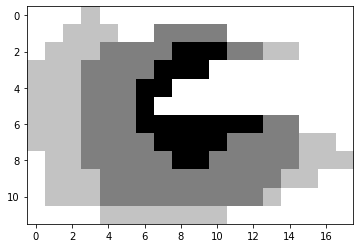

In [2]:
img = cv.imread('./img/raw_gray.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

In [3]:
# Schreiben Sie hier eine Funktion histogram(img), die das Histogramm + normierte Histogramm des Grauwertbildes zurückgibt
def histogram(image):
    width = len(image)
    height = len(image[0])

    # Anzahl der Pixel mit jeweiligem Farbwert speichern
    hist_list = [0 for _ in range(256)]
    for width_I in range(width):
        for height_I in range(height):
            value = img[width_I][height_I]

            hist_list[value] += 1

    # Prozentualer Anteil der Farbwerte berechnen
    pxSum = width * height
    norm_hist_list = [count / pxSum for count in hist_list]

    return hist_list, norm_hist_list

## Histogramme

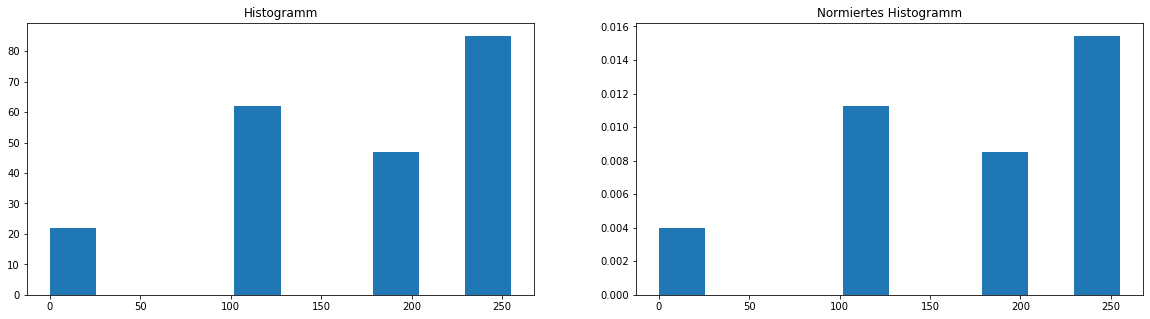

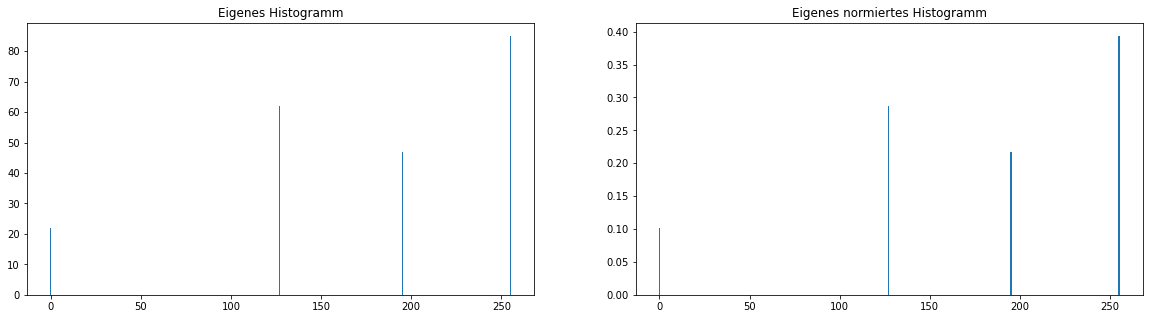

In [4]:
# Ausführung der geschriebenen Funktion
hist, norm_hist = histogram(img)

# Vergleich mit implementierter Histogramm Funktion
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.hist(img.ravel(), density=False)
plt.title('Histogramm')

plt.subplot(1, 2, 2)
plt.hist(img.ravel(), density=True)
plt.title('Normiertes Histogramm')
plt.show()

# Anzeigen der eigenen Histogramme
# plt.bar möchte als ersten Parameter eine Liste an X-Werten. Diese ergeben sich aus der Länge der Histogramm-Liste
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.bar([i for i in range(len(hist))], hist)
plt.title('Eigenes Histogramm')

plt.subplot(1, 2, 2)
plt.bar([i for i in range(len(norm_hist))], norm_hist)
plt.title('Eigenes normiertes Histogramm')
plt.show()

`plt.hist` ordnet die Säulen links, rechts und mittig vom eigentlichen Wert an (zufällig?). Dieses Verhalten kann mit
`plt.bar` nicht repliziert werden. Zwar können die Säulen mit `width=25` auf die gleiche Breite gebracht werden, allerdings
stimmt dann das Aligment zur x-Achse nicht mit den Säulen aus den oberen Histogrammen überein.

Daher ist die eigene Alternative im dem Sinne besser, dass die Helligkeitswerte direkt aus dem Histogramm entnommen werden
können.

# Histogramme eines Farbbilds

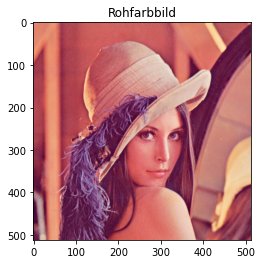

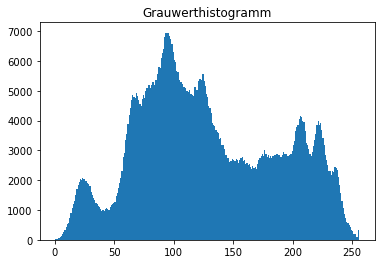

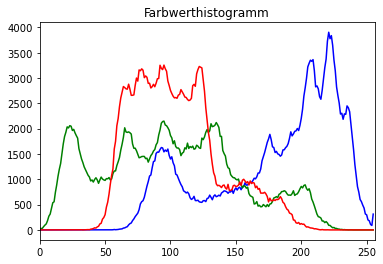

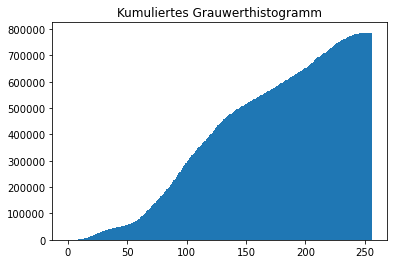

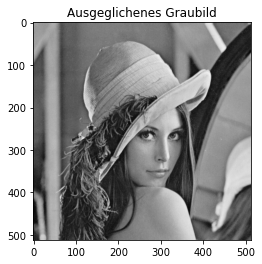

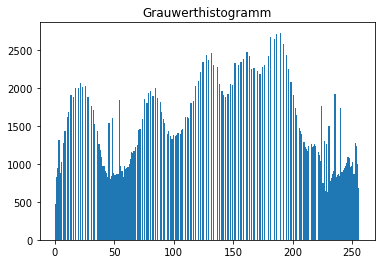

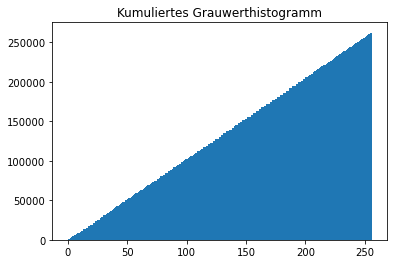

In [5]:
img_lena = cv.imread('./img/lena.jpg', -1)
img_lena = cv.cvtColor(img_lena, cv.COLOR_BGR2RGB)
plt.figure()
plt.title('Rohfarbbild')
plt.imshow(img_lena)

plt.figure()
plt.title('Grauwerthistogramm')
plt.hist(img_lena.ravel(), 256, [0, 256])
plt.show()

# erstelle Farbwerthistogramm über R-, G- und B-Kanal
color = ('b', 'g', 'r')
plt.figure()
for i, col in enumerate(color):
    histr = cv.calcHist([img_lena], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.title('Farbwerthistogramm')
plt.show()

# erstelle kumuliertes (=aufsummiertes) Histogramm
plt.figure()
plt.title('Kumuliertes Grauwerthistogramm')
plt.hist(img_lena.ravel(), 256, [0, 256], cumulative=True)
plt.show()

# führe Histogrammausgleich durch
img_lena_gray = cv.cvtColor(img_lena, cv.COLOR_RGB2GRAY)
img_lena_eq = cv.equalizeHist(img_lena_gray)

plt.figure()
plt.title('Ausgeglichenes Graubild')
plt.imshow(img_lena_gray, cmap='gray')

plt.figure()
plt.title('Grauwerthistogramm')
plt.hist(img_lena_eq.ravel(), 256, [0, 256])
plt.show()

plt.figure()
plt.title('Kumuliertes Grauwerthistogramm')
plt.hist(img_lena_eq.ravel(), 256, [0, 256], cumulative=True)
plt.show()

# Histogramm-Ausgleich

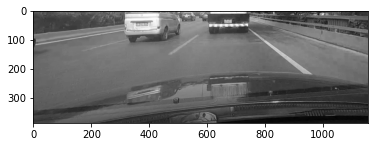

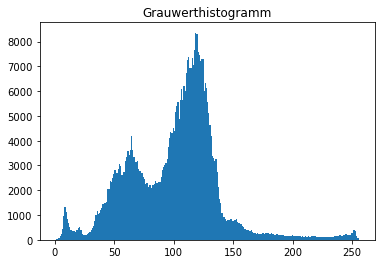

In [6]:
plt.figure()
img_lane = cv.imread('./img/uclanes_ex.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img_lane, cmap='gray')

plt.figure()
plt.title('Grauwerthistogramm')
plt.hist(img_lane.ravel(), 256, [0, 256])
plt.show()

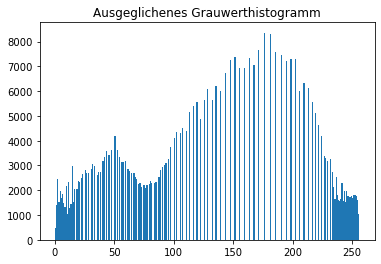

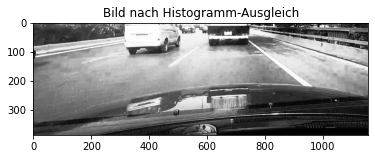

In [7]:
# führe Histogrammausgleich durch
img_lane_eq = cv.equalizeHist(img_lane)

plt.figure()
plt.title('Ausgeglichenes Grauwerthistogramm')
plt.hist(img_lane_eq.ravel(), 256, [0, 256])
plt.show()

plt.figure()
plt.title('Bild nach Histogramm-Ausgleich')
plt.imshow(img_lane_eq, cmap='gray')
plt.show()

# Punktoperatoren: Lineare Skalierung

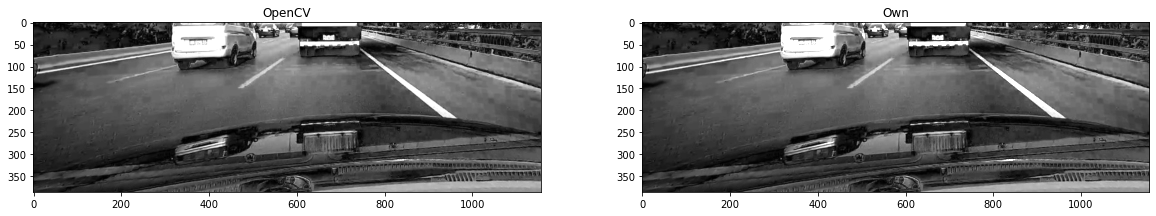

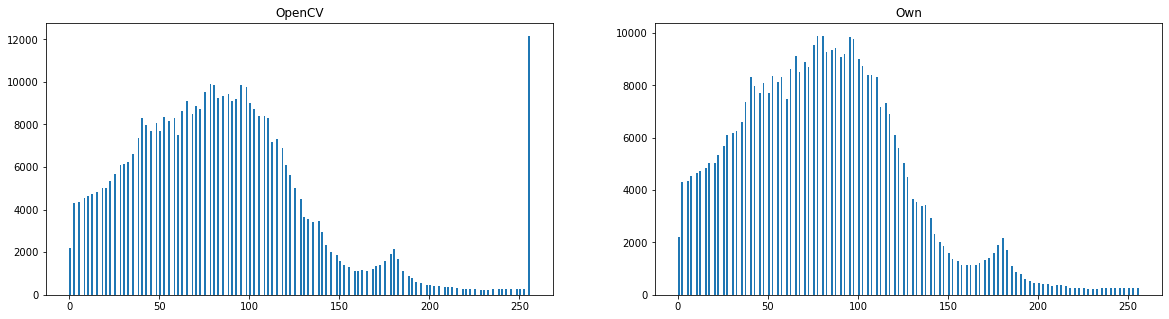

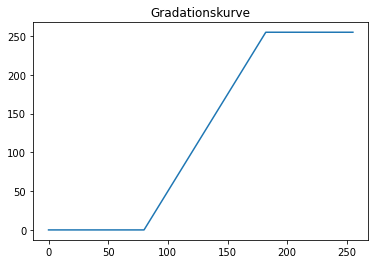

In [8]:
# Helligkeits- und Kontrastanpassung
# Schreiben Sie eine Funktion scale_img(img),
# die die Pixel des Eingangsbildes skaliert und mit einem Bias versieht:
# f*(x,y) = alpha * f(x,y) + beta
def scale_img(img, alpha, beta):
    new_img = []
    for width_I in range(len(img)):
        new_img.append([int(abs(alpha * value + beta)) for value in img[width_I]])

    return np.array(new_img)


# Beispiel:
# alpha < 1 --> reduziert Kontrast
# beta = 200 erhöht Helligkeit
alpha = 2.5
beta = -200
new_lane_own = scale_img(img_lane, alpha, beta)
new_lane = cv.convertScaleAbs(img_lane, alpha=alpha, beta=beta)
x = np.linspace(0, 255, 256)
y = alpha * x + beta
y = np.clip(y, 0, 255)

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.imshow(new_lane, cmap='gray', vmin=0, vmax=255)
plt.title("OpenCV")

plt.subplot(1, 2, 2)
plt.imshow(new_lane_own, cmap="gray", vmin=0, vmax=255)
plt.title("Own")
plt.show()

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.hist(new_lane.ravel(), 256, [0, 256])
plt.title("OpenCV")

plt.subplot(1, 2, 2)
plt.hist(new_lane_own.ravel(), 256, [0, 256])
plt.title("Own")
plt.show()

plt.figure()
plt.plot(x, y)
plt.title('Gradationskurve')
plt.show()

# Punktoperatoren: Logarithmische Skalierung und Gamma-Korrektur

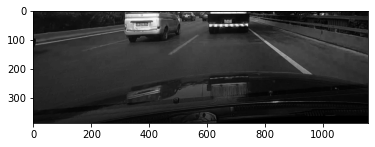

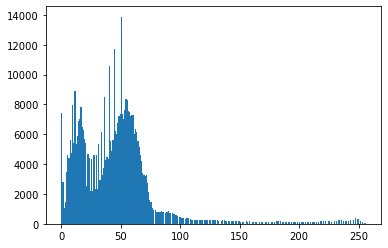

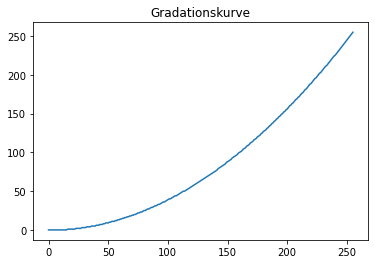

In [9]:
# Gamma-Korrektur

# Beispiel: 
gamma = 2

# Erstelle Look-Up-Table
lookUpTable = np.empty((1, 256), np.uint8)
for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)

# Wende Loop-up-table an
new_lane = cv.LUT(img_lane, lookUpTable)

# verteile 256 Werte von 0 bis 255 
x = np.linspace(0, 255, 256)

plt.figure()
plt.imshow(new_lane, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.figure()
plt.hist(new_lane.ravel(), 256, [0, 256])
plt.show()

plt.figure()
plt.plot(x, lookUpTable[0, :])
plt.title('Gradationskurve')
plt.show()

# Thresholding

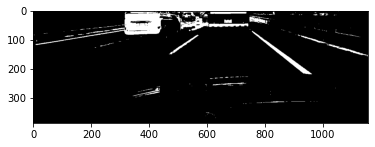

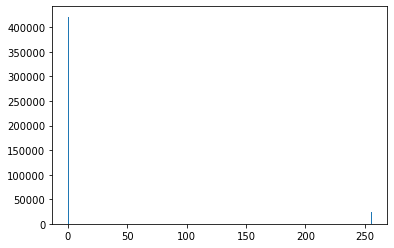

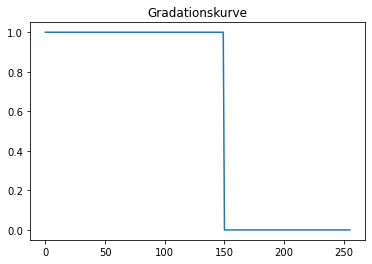

In [10]:
# Beispiel: 
thresh = 150

# wende Threshold an
ret, new_lane = cv.threshold(img_lane, thresh=thresh, maxval=255, type=cv.THRESH_BINARY)

x = np.linspace(0, 255, 256)
y = (x < thresh)

plt.figure()
plt.imshow(new_lane, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.figure()
plt.hist(new_lane.ravel(), 256, [0, 256])
plt.show()

plt.figure()
plt.plot(x, y)
plt.title('Gradationskurve')
plt.show()

_ = cv.imwrite('./img/lanes_threshold.jpg', new_lane)

# Grauwert-Slicing
Beim Grauwert-Slicing wird versucht, das ursprüngliche Graubild durch wenige repräsentative Grauwerte abzubilden. Um repräsentative Grauwerte zu finden, wird das Histogramm betrachtet.

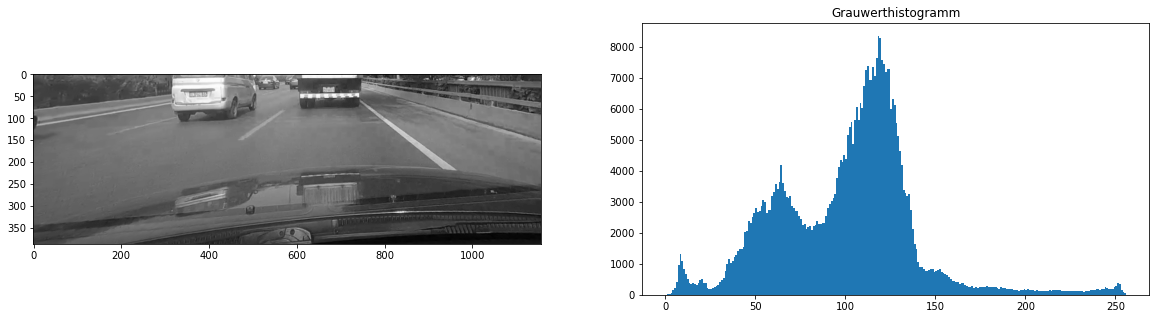

In [11]:
# zeige Originalbild und Histogramm
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_lane, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Grauwerthistogramm')
plt.hist(img_lane.ravel(), 256, [0, 256])
plt.show()

Es zeigen sich folgende Wertebereiche: 
- 0 - 24 --> 0
- 25 - 80 --> 85
- 80 - 170 --> 170
- 171 - 255 --> 255

Diese werden im Gray-Level-Slicing entsprechend zusammengefasst

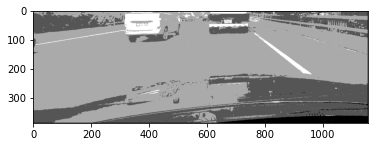

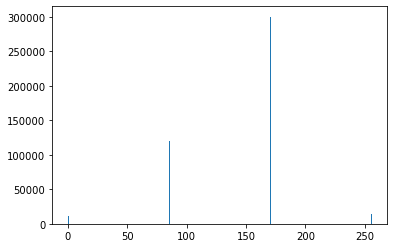

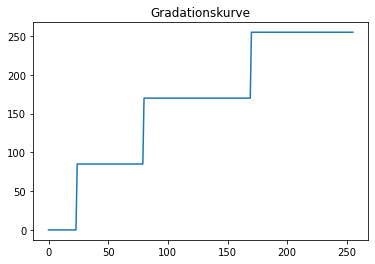

In [12]:
thresh1 = 24
thresh2 = 80
thresh3 = 170

w = len(img_lane[0])
h = len(img_lane)

# erstelle leeres Bild
img_sliced = np.zeros((h, w), dtype=int)

# iteriere über die Pixel und weise sie den einzelnen Thresholds zu
for i in range(h - 1):
    for j in range(w - 1):
        if img_lane[i, j] <= thresh1:
            img_sliced[i, j] = 0
        elif thresh1 < img_lane[i, j] <= thresh2:
            img_sliced[i, j] = 85
        elif thresh2 < img_lane[i, j] <= thresh3:
            img_sliced[i, j] = 170
        else:
            img_sliced[i, j] = 255

        # berechne Gradationskurve
x = np.linspace(0, 255, 256)
y = np.zeros(256)
y[0:thresh1] = 0
y[thresh1:thresh2] = 85
y[thresh2:thresh3] = 170
y[thresh3:] = 255

plt.figure()
plt.imshow(img_sliced, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.figure()
plt.hist(img_sliced.ravel(), 256, [0, 256])
plt.show()

plt.figure()
plt.plot(x, y)
plt.title('Gradationskurve')
plt.show()

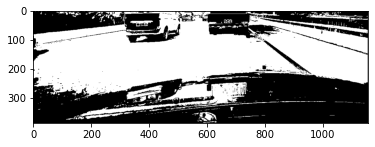

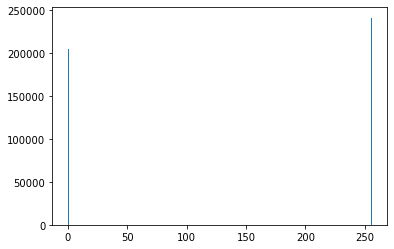

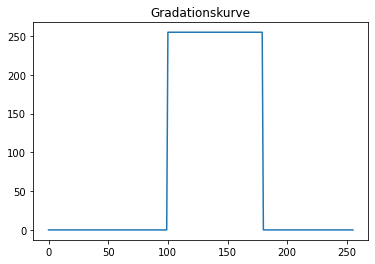

In [13]:
# Anpassung: Mapping der Signale auf 0 und 255

thresh1 = 100
thresh2 = 180

w = len(img_lane[0])
h = len(img_lane)

# erstelle leeres Bild
img_sliced = np.zeros((h, w), dtype=int)

for i in range(h - 1):
    for j in range(w - 1):
        if thresh1 < img_lane[i, j] < thresh2:
            img_sliced[i, j] = 255
        else:
            img_sliced[i, j] = 0

x = np.linspace(0, 255, 256)
y = np.zeros(256)
y[0:thresh1] = 0
y[thresh2:-1] = 0
y[thresh1:thresh2] = 255

plt.figure()
plt.imshow(img_sliced, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.figure()
plt.hist(img_sliced.ravel(), 256, [0, 256])
plt.show()

plt.figure()
plt.plot(x, y)
plt.title('Gradationskurve')
plt.show()

# Logarithmische Skalierung

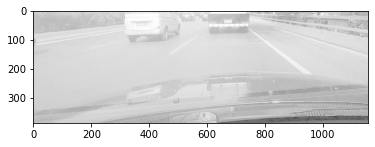

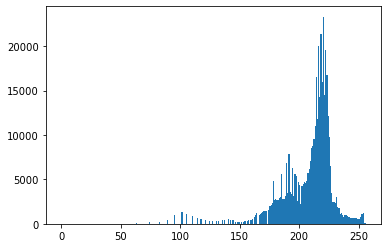

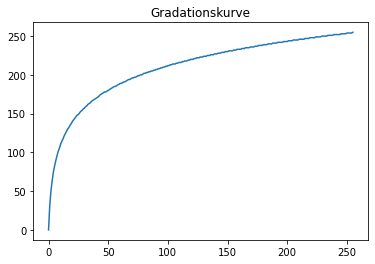

In [14]:
# Gamma-Korrektur

# Beispiel: 
c = 255 / (np.log(1 + np.max(img_lane)))

# erstelle Look-up-Table
lookUpTable = np.empty((1, 256), np.uint8)
for i in range(256):
    lookUpTable[0, i] = np.clip(c * np.log(1 + i), 0, 255)

# wende Look-up-table an
new_lane = cv.LUT(img_lane, lookUpTable)

x = np.linspace(0, 255, 256)

plt.figure()
plt.imshow(new_lane, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.figure()
plt.hist(new_lane.ravel(), 256, [0, 256])
plt.show()

plt.figure()
plt.plot(x, lookUpTable[0, :])
plt.title('Gradationskurve')
plt.show()

# Negativ

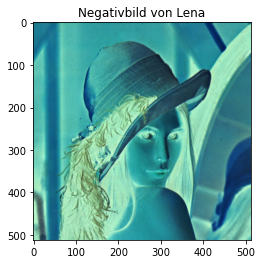

In [15]:
# erstelle das Negativ eines Bildes
img_lena_neg = cv.bitwise_not(img_lena)
plt.imshow(img_lena_neg)
plt.title('Negativbild von Lena')
plt.show()

# Aufgabe: Können Sie die versteckte Botschaft entschlüsseln?

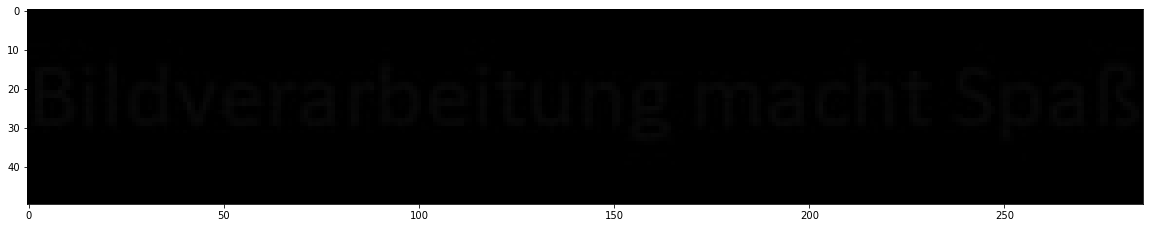

Durch Scaling:


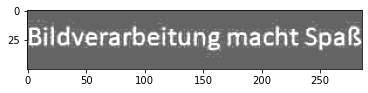

Durch Benutzen eines Thresholds:


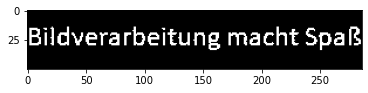

In [16]:
# lade Bild und stelle es dar
img = cv.imread('./img/versteckt.jpg', cv.IMREAD_GRAYSCALE)
plt.figure(figsize=(20, 10))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

# Botschaft durch Scaling
print("Durch Scaling:")
plt.imshow(scale_img(img, 25, 100), cmap='gray', vmin=0, vmax=255)
plt.show()

# Botschaft durch Threshold
print("Durch Benutzen eines Thresholds:")
plt.imshow(cv.threshold(img, thresh=3, maxval=255, type=cv.THRESH_BINARY)[1], cmap='gray', vmin=0, vmax=255)
plt.show()

## Aufgabe: Heben Sie auf folgenden Bildern die Linienmarkierungen hervor.

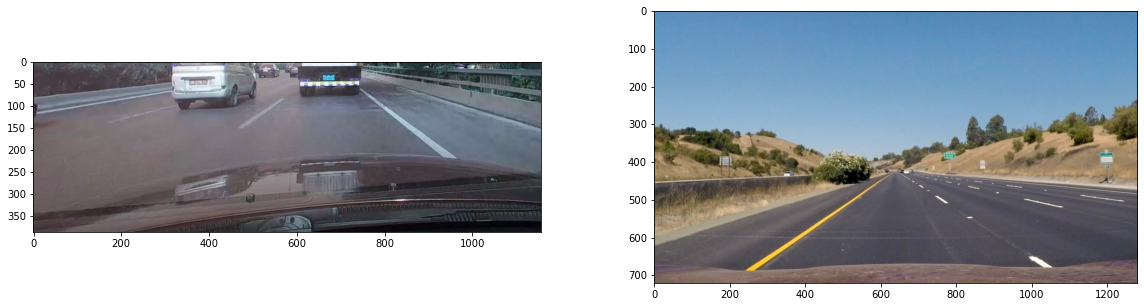

In [17]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
img_lane1 = cv.imread('./img/uclanes_ex.jpg', -1)
plt.imshow(img_lane1)

plt.subplot(1, 2, 2)
img_lane2 = cv.imread('./img/image001.jpg', -1)
img_lane2 = cv.cvtColor(img_lane2, cv.COLOR_BGR2RGB)
plt.imshow(img_lane2)
plt.show()

In [18]:
# Funktion zum Slicing von Grauwerten aus den Bildern
def slice_image(slice_img, start_slice, end_slice, show=True):
    # Konvertiere Bild zu Grauwerten
    slice_img = cv.cvtColor(slice_img, cv.COLOR_RGB2GRAY)

    # Dimensionen extrahieren
    width = len(slice_img)
    height = len(slice_img[0])

    # Leeres Bild erstellen
    sliced_image = np.zeros((width, height), dtype=int)
    for width_index in range(width):
        for height_index in range(height):
            pxValue = slice_img[width_index, height_index]

            # Überprüfen, ob Pixelwert in dem angegeben Bereich liegt
            if start_slice < pxValue < end_slice:
                # Falls ja, kopieren
                sliced_image[width_index][height_index] = pxValue

    # Anzeigen, falls gewünscht
    if show:
        plt.figure()
        plt.imshow(sliced_image, cmap="gray")
        plt.title("Extrahiertes Bild")
        plt.show()

    return sliced_image

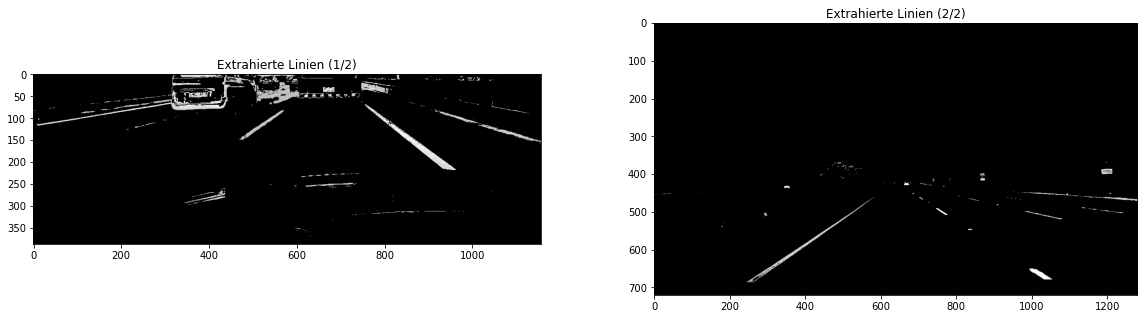

In [19]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.imshow(slice_image(cv.cvtColor(img_lane1, cv.COLOR_BGR2RGB), 150, 210, False), cmap="gray")
plt.title("Extrahierte Linien (1/2)")

plt.subplot(1, 2, 2)
plt.imshow(slice_image(img_lane2, 200, 255, False), cmap="gray")
plt.title("Extrahierte Linien (2/2)")
plt.show()

Durch die hellen Fahrzeuge (oder deren Reflektoren) im ersten Bild ist hier das Hervorheben gestört und nicht so
deutlich möglich wie in Bild 2.

Das Hervorheben wurde durch Grauwert-Slicing erreicht.
